In [5]:
import SNIDsn
import SNIDdataset
import numpy as np
import matplotlib.pyplot as plt

In [6]:
sn1994D = SNIDsn.SNIDsn()

In [7]:
sn1994D.loadSNIDlnw("Tutorial_Data/sn1994D.lnw")
sn1994D.restoreContinuum()
normalized = sn1994D.data_unflat

In [87]:
with open("Tutorial_Data/sn1994D.lnw") as lnw:
    lines = lnw.readlines()
    lnw.close()
fmean_line = lines[1].strip()
fmean_items = fmean_line.split()
fmean_items.pop(0)
fmean_string = []
for i in range(len(fmean_items)):
    if i % 2 != 0:
        fmean_string.append(fmean_items[i])
fmean_log = []
for element in fmean_string:
    fmean_log.append(float(element))
fmean_lst = []
for element in fmean_log:
    fmean_lst.append(10 ** element)
count = 0
for fmean in fmean_lst:
    normalized[:, count] = normalized[:, count] * fmean
    count += 1
actual_data = normalized

In [199]:
wvl = sn1994D.wavelengths
phase1 = normalized[:, 0]

In [28]:
def find_endpoints(phase):
    l1 = -1
    l2 = -1 #placeholder index
    wvl_lst = []
    for i in range(len(phase)):
        if phase[i] != 0 and l1 == -1:
            l1 = i
        if phase[i] == 0 and l1 != -1:
            l2 = i - 1
        elif phase[i] != 0 and l1 != -1:
            l2 = i
    return l1, l2

In [55]:
def calc_knots(phase):
    nknot = 0
    kwidth = 1024 // 13
    nave = 0
    wave = 0
    fave = 0
    l1, l2 = find_endpoints(phase)
    xknot = []
    yknot = []
    for i in range(len(phase)):
        if i > l1 and i < l2:
            nave += 1
            wave += i - 0.5
            fave += phase[i]
        if i % kwidth == 0:
            if nave > 0 and fave > 0:
                nknot += 1
                xknot.append(np.log10(wave / nave))
                yknot.append(np.log10(fave / nave))
            nave = 0
            wave = 0
            fave = 0
    return yknot

In [344]:
xknots = []
for i in range(39):
    phase_knots = calc_knots(actual_data[:, i])
    xknots.append(phase_knots)
knots = []
for phase in xknots:
    for i in range(len(phase)):
        if phase[i] != 0:
            knots.append(phase[i])
knots.sort()
knots

[2.1861083798132053,
 2.1861083798132053,
 2.187520720836463,
 2.290034611362518,
 2.290034611362518,
 2.290034611362518,
 2.3394514413064407,
 2.3443922736851106,
 2.3453737305590883,
 2.357934847000454,
 2.3654879848909,
 2.436162647040756,
 2.436162647040756,
 2.436162647040756,
 2.436162647040756,
 2.436162647040756,
 2.436162647040756,
 2.436162647040756,
 2.436162647040756,
 2.469822015978163,
 2.469822015978163,
 2.4712917110589387,
 2.4712917110589387,
 2.47928731647617,
 2.48572142648158,
 2.48572142648158,
 2.48572142648158,
 2.48572142648158,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.4871383754771865,
 2.4871383754771865,
 2.4885507165004443,
 2.4892551683692603,
 2.4913616938342726,
 2.4927603890268375,
 2.4927603890268375,
 2.5453071164

In [345]:
np.set_printoptions(threshold=np.inf)
continuum = sn1994D.continuum.tolist()
continuum.pop(0)
xknot_zeroes = []
for phase in continuum:
    xknot_zeroes.append(phase[1::2])
real_knots = []
for phase in xknot_zeroes:
    for i in range(len(phase)):
        if phase[i] != 0:
            real_knots.append(phase[i])
real_knots.sort()
real_knots

[2.179,
 2.1804,
 2.1833,
 2.29,
 2.29,
 2.29,
 2.3075,
 2.3181,
 2.3212,
 2.3473,
 2.3627,
 2.4362,
 2.4362,
 2.4362,
 2.4362,
 2.4362,
 2.4362,
 2.4362,
 2.4362,
 2.4448,
 2.4456,
 2.4472,
 2.4472,
 2.4639,
 2.4778,
 2.4778,
 2.4778,
 2.4778,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4793,
 2.4793,
 2.4807,
 2.4807,
 2.4836,
 2.4843,
 2.4886,
 2.4914,
 2.4921,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5515,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,

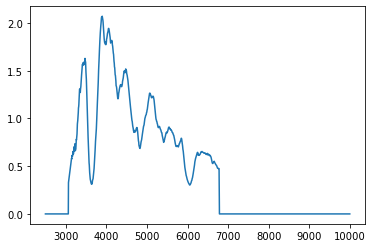

In [112]:
plt.plot(wvl, phase1)

In [4]:
difference = []
for i in range(len(knots)):
    distance = np.abs(knots[i] - real_knots[i])
    difference.append(distance)
difference

NameError: name 'knots' is not defined

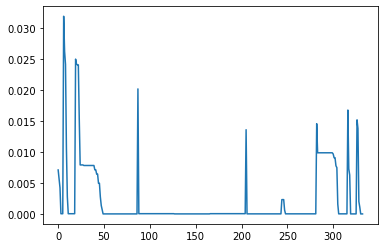

In [347]:
plt.plot(difference)

In [356]:
def convert_xknot_wvl(xknot, nw, wvl): #same function in SNIDsn
    pix = np.arange(nw)+1
    wave = np.interp(xknot,pix,wvl)
    return wave

In [358]:
def calc_wvl(xknot):
    wvl = []
    for knot in xknot:
        wavelength = convert_xknot_wvl(knot, 1024, sn1994D.wavelengths)
        wvl.append(wavelength)
    return wvl

In [373]:
wvl = calc_wvl(knots)
wvl_real = calc_wvl(real_knots)


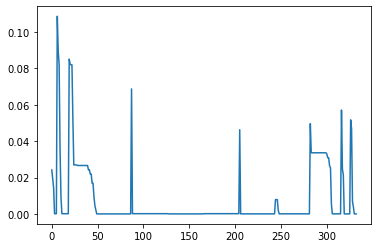

In [374]:
wvl_difference = []
for i in range(len(wvl)):
    wvl_distance = np.abs(wvl[i] - wvl_real[i])
    wvl_difference.append(wvl_distance)
plt.plot(wvl_difference)

In [38]:
sn2020oi_fluxes_original = np.loadtxt("Tutorial_Data/sn2020oi_phase.ascii", usecols=1)
sn2020oi_wavelengths_original = np.loadtxt("Tutorial_Data/sn2020oi_phase.ascii", usecols=0)
sn2020oi_flux, sn2020oi_wavelength = SNIDsn.binspec(sn2020oi_wavelengths_original, sn2020oi_fluxes_original, 2500.00, 10000.00, 7500/1024)

In [39]:
sn2020oi_xknot, sn2020oi_yknot = calc_knots(sn2020oi_flux)

In [40]:
sn2020oi_yknot

[-14.603328087546801,
 -14.389507088663894,
 -14.2493885705009,
 -14.185722710890449,
 -14.097689367480385,
 -14.201551601687335,
 -14.246601064565837,
 -14.358016361638095,
 -14.503669971486646,
 -14.464534114535201,
 -14.544263983222823,
 -14.589535999460548]

In [96]:
all_yknots = []
for i in range(39):
    y_knots = calc_knots(actual_data[:, i])
    all_yknots.append(y_knots)
yknots = []
for phase in all_yknots:
    for i in range(len(phase)):
        yknots.append(phase[i])
len(yknots)

333

In [98]:
yknot_continuum = continuum = sn1994D.continuum.tolist()
yknot_continuum.pop(0)
yknot_zeroes = []
for phase in yknot_continuum:
    yknot_zeroes.append(phase[0::2])
real_yknots = []
for phase in yknot_zeroes:
    phase.pop(0)
for phase in yknot_zeroes:
    for i in range(len(phase)):
        if phase[i] != 0:
            real_yknots.append(phase[i])
real_yknots.sort()

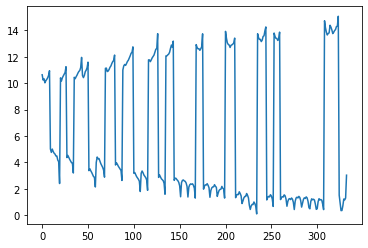

In [99]:
ydifference = []
for i in range(len(yknots)):
    ydistance = np.abs(yknots[i] - real_yknots[i])
    ydifference.append(ydistance)
plt.plot(ydifference)

array([1.53787668e-13, 2.42137317e+02, 1.92932166e-13, 1.66608217e+02,
       2.52450996e-13, 3.29007724e-13, 6.77497165e+01, 5.19223852e+02,
       5.29030382e-13, 4.55970442e+02, 5.06733784e-13, 3.34545588e+02,
       4.96126422e+02, 5.86802046e-13, 3.04877566e+02, 3.78186394e-13,
       3.36346749e+02, 2.70672823e+02, 1.37920779e+02, 1.54483426e-13,
       1.20067808e+02, 9.26056155e+01, 6.22877775e+01, 8.33977338e-14,
       3.05203920e+01, 1.98685438e+01, 4.07214484e+00, 3.71517800e-14,
       2.21220307e+01, 3.13413933e-14, 2.36230528e+01, 1.54103810e+01,
       1.82127935e+01, 2.10030967e+01, 1.65074850e+01, 1.53437142e+01,
       2.03370304e-14, 1.45604172e-14, 3.18996656e-01])